# 선형회귀 직접 구현

## 데이터셋 준비

 - 사이킷런 임의 회귀 데이터 생성

In [595]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [596]:
# 가상의 데이터 생성
data = make_regression(n_samples = 1000, n_features = 1, bias = 1000, noise = 50) 
# 1000개의 데이터, 1개의 특성 가진 데이터 셋을 생성합니다.
len(data), data[0].shape, data[1].shape
#X_1 -> data[0] / y_1 -> data[1]

(2, (1000, 1), (1000,))

In [597]:
x_train = data[0]
y_train = data[1]

n_data = len(x_train)
print(n_data, x_train.shape, y_train.shape)

1000 (1000, 1) (1000,)


## Hypothesis, Cost 정의

 - hypothesis: x_train * w1 + w0
 - cost : RSS

## Weight 초기화

In [598]:
w1 = np.random.rand(1)
w0 = np.random.rand(1)
print(w1, w0)

[0.37940381] [0.77108704]


## y_pred 계산

In [599]:
y_pred = w1*x_train.reshape(-1)+w0
y_pred[:5]

array([0.64590053, 0.97191908, 0.1981963 , 0.61615126, 0.42529016])

## cost 계산

 - cost = np.mean((y_train - y_pred) ** 2)

In [600]:
cost = np.mean((y_pred-y_train)**2)
cost

1017123.4950509369

## Weight 업데이트

 - w1 = (-1) * np.sum((y_train - y_pred)  * x_train) * 2 / n_data
 - w0 = (-1) * np.sum(y_train - y_pred) * 2 / n_data

In [601]:
y_pred = w1*x_train+w0
cost = np.mean((y_pred.reshape(-1)-y_train)**2)
w3 = (-1)*np.sum((y_train.reshape(-1,1)-y_pred)*x_train)*2/n_data
w2 = (-1)*np.sum(y_train.reshape(-1,1)-y_pred)*2/n_data
w3, w2

(-235.78740593016556, -2008.3899802270257)

In [602]:
y_pred = w1*x_train.reshape(-1)+w0
w3 = (-1)*np.sum((y_train-y_pred)*x_train.reshape(-1)*2)/n_data
w2 = (-1)*np.sum(y_train-y_pred*2)/n_data
w3, w2

(-235.78740593016556, -1003.4083590189973)

In [603]:
w1 = np.sum((y_pred - y_train.reshape(-1, 1)) * x_train * 2) / n_data
w0 = np.sum((y_pred - y_train.reshape(-1, 1)) * 2) / n_data
w1, w0

(-236486.09173945608, -2008389.9802270266)

## 반복

 - epochs : 반복횟수
 - learning rate : 학습률

 - 출력 지우기
    - from IPython.display import clear_output 
    - clear_output()

In [604]:
epochs = 1000
learning_rate = 0.01

In [605]:
# 가상의 데이터 생성
data = make_regression(n_samples = 1000, n_features = 1, bias = 1000, noise = 50) 
x_train = data[0]
y_train = data[1]
n_data = len(x_train)
w1 = np.random.rand(1)
w0 = np.random.rand(1)
cost_list=[]

for i in range(epochs):
    y_pred = w1*x_train+w0
    cost = np.mean((y_pred.reshape(-1)-y_train)**2)
    w1 += learning_rate*((-1)*np.sum((y_pred-y_train.reshape(-1,1))*x_train*2)/n_data)
    w0 += learning_rate*((-1)*np.sum((y_pred-y_train.reshape(-1,1))*2)/n_data)
    cost_list.append(cost)
x_train*w1+w0, y_train

for i in range(epochs):
    y_pred = w1*x_train+w0
    cost = np.mean((y_pred.reshape(-1)-y_train)**2)
    w1 += learning_rate*((-1)*np.sum((y_pred-y_train.reshape(-1,1))*x_train)*2/n_data)
    w0 += learning_rate*((-1)*np.sum((y_pred-y_train.reshape(-1,1)))*2/n_data)
    cost_list.append(cost)
x_train*w1+w0, y_train

(array([[ 930.18486601],
        [1025.52663249],
        [1054.06460468],
        [1041.65051583],
        [ 990.52246934],
        [1050.63798672],
        [1081.1356299 ],
        [ 996.70717551],
        [1072.67074223],
        [1022.42219077],
        [ 896.9069883 ],
        [1081.08708348],
        [1025.71110319],
        [1049.94332722],
        [ 970.73959714],
        [1028.24369333],
        [1040.42870438],
        [1041.78138501],
        [ 969.19528381],
        [ 974.20526091],
        [1048.12437348],
        [1025.18286028],
        [1018.01937061],
        [1076.91801641],
        [ 957.49102561],
        [1093.23173409],
        [1125.23801401],
        [ 923.87303631],
        [1019.71563219],
        [ 951.46462836],
        [ 848.00101162],
        [ 882.79481777],
        [ 993.66482307],
        [1029.72503881],
        [ 949.73135903],
        [ 996.828436  ],
        [ 961.24031075],
        [ 966.75002114],
        [1004.8620398 ],
        [ 962.60383475],


In [606]:
cost_list

[1001742.3656074689,
 962161.6343122759,
 924148.8969069822,
 887642.0367379024,
 852581.397942947,
 818909.6879650763,
 786571.8839278028,
 755515.1427197385,
 725688.7146412502,
 697043.8604721039,
 669533.7718245692,
 643113.4946518285,
 617739.8557866869,
 593371.3923905337,
 569968.2841972627,
 547492.2884414234,
 525906.6773642655,
 505176.1781955479,
 485266.91551303363,
 466146.355885474,
 447783.25470861874,
 430147.60514737247,
 413210.5891006609,
 396944.53010887204,
 381322.848126918,
 366320.0160890051,
 351911.51819413435,
 338073.8098441617,
 324784.2791689501,
 312021.2100757395,
 299763.74676235067,
 287991.8596362302,
 276686.31258364476,
 265828.6315355346,
 255401.07427865974,
 245386.60146270331,
 235768.84875595375,
 226532.10010406337,
 217661.26204818397,
 209141.83906051057,
 200959.90985692822,
 193102.1046480515,
 185555.5832914834,
 178308.01430958885,
 171347.55473849567,
 164662.83077539245,
 158242.9191924985,
 152077.3294873331,
 146155.98674011463,
 140

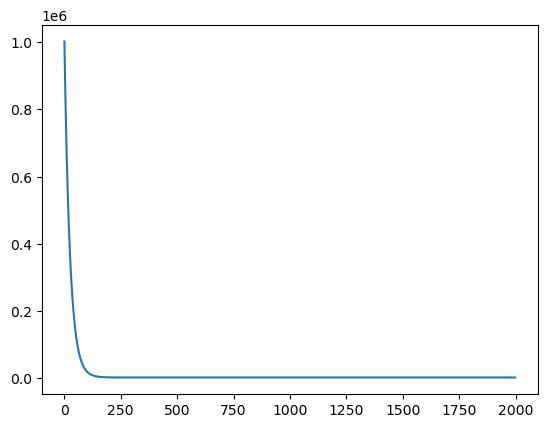

In [607]:
plt.plot(cost_list)
plt.show()

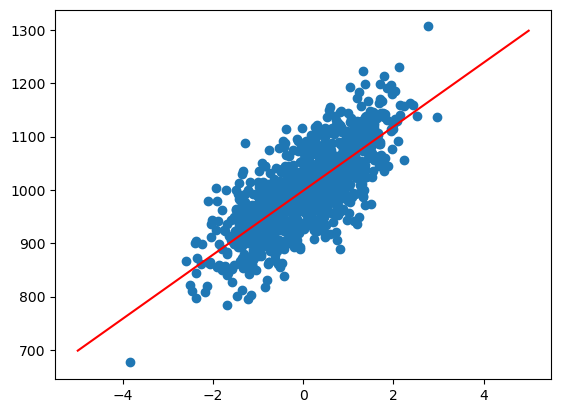

In [608]:
plt.plot([-5, 5], [-5*w1+w0, 5*w1+w0], color='r')
plt.scatter(x_train, y_train)
plt.show()

In [609]:
np.array([[[1,2],[1,2]],[[1,2],[1,2]]]).shape
x_train.shape, np.ravel(x_train).shape
# np.ravel(np.array([[[1,2],[1,2]],[[1,2],[1,2]]])).shape

((1000, 1), (1000,))

## class로 구현 실습

In [610]:
import numpy as np
from tqdm.notebook import tqdm

class make_linear_regression_model:
    def __init__(self) -> None:
        pass
        
    def fit(self, X_data, y_data, learning_rate=0.01):
        if len(X_data)!=len(y_data):
            raise Exception('data의 크기가 같지 않습니다!')
        self.n_data = n_data = len(y_data)
        self.X_data = X_data = np.ravel(X_data)
        self.y_data = y_data
        self.w1, self.w0 = np.random.rand(2)

        cost=list(range(10))
        while np.sum([int(i)-int(cost[-1]) for i in cost[-10:]])!=0:
        # int(self.cost)!=int(cost):
            y_pred = self.w1*X_data+self.w0
            cost.append(np.mean((y_pred-y_data)**2))
            self.w1 += learning_rate*((-1)*np.sum((y_pred-y_data)*X_data)*2/n_data)
            self.w0 += learning_rate*((-1)*np.sum((y_pred-y_data))*2/n_data)
        self.cost = cost[-1]
        # self.y_pred = y_pred = X_data*w1+w0
        # return y_pred
        

    def predict(self, X_data):
        return np.ravel(X_data)*self.w1+self.w0

    def score(self, y_data, y_pred):
        if y_data.shape != y_pred.shape:
            raise Exception('y_data의 크기가 y_pred의 크기와 같지 않습니다!')
        return 1-(np.sum((y_train-y_pred)**2)/np.sum((y_train-np.average(y_train))**2))

In [611]:
from sklearn.metrics import r2_score

tmp = make_linear_regression_model()
tmp.fit(x_train, y_train)
print(tmp.w1, tmp.w0, tmp.cost)
print()
print(tmp.predict(x_train))
print()
print(tmp.score(y_train,tmp.predict(x_train))==r2_score(y_train,tmp.predict(x_train)), tmp.score(y_train,tmp.predict(x_train)), r2_score(y_train,tmp.predict(x_train)))

59.92122396761835 997.2198805547043 2604.064809797666

[ 928.89877851 1024.15373903 1052.66572821 1040.26294204  989.18144617
 1049.24223009 1079.71210603  995.36052135 1071.2549254  1021.05212382
  895.65119935 1079.66360382 1024.33804178 1048.54820306  969.41658571
 1026.86832607 1039.04224301 1040.39369207  967.87367844  972.8790941
 1046.73090542 1023.81027982 1016.6533123  1075.49833257  956.18007663
 1091.79719707 1123.77433618  922.59269555 1018.34802948  950.15916624
  846.78975018  881.55187755  992.32093888 1028.34832282  948.42747501
  995.48167143  959.92594815  965.43064211 1003.50796086  961.2882307
  951.50821343 1060.68831515  944.81221081 1068.81650939  767.28170755
  952.33495414  964.34299632 1086.95032528 1130.71050696  957.5887526
 1024.26194046 1046.68418119  922.3598516  1039.43507436 1025.90870987
  937.80586843 1077.03428119  854.47854139 1100.95366487 1022.81813838
  922.64241472 1096.62926076 1044.70793625  945.23217911  939.19660039
 1004.42754753 1007.24903

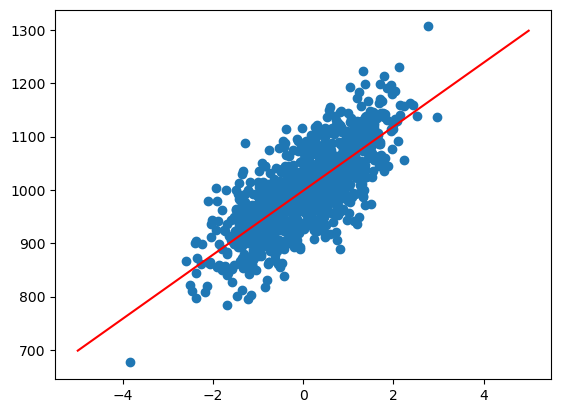

In [612]:
plt.plot([-5, 5], [-5*w1+w0, 5*w1+w0], color='r')
plt.scatter(x_train, y_train)
plt.show()